In [1]:
import pandas
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import math


path = os.getcwd() 

df = pandas.read_csv('data for armankade.csv', sep='\t')
df.head()

,line,text,average tag
0,1,با تشکر از شما آقای عباسی,POSITIVE
1,2,برنامه خندوانه به زندگی ما انرژی داده مرسی,POSITIVE
2,3,مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...,NEGATIVE
3,4,مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...,POSITIVE
4,5,@_zahra_str_75 بیخیار سالاد نمیشه,NATURAL


In [2]:
import emoji
import regex
import re
from hazm import Normalizer

normalizer = Normalizer()
punctuation_signs = list("?:!.,;")

def clean_text(text,normalizer=normalizer):
    text=  emoji.demojize(text)
    text= re.sub(r'(:[!_\-\w]+:)', '', text)
    text= re.sub(r'@\w+', ' ', text)
    text =  text.replace("#", " ")
    text =  text.replace("-", " ")
    text =  text.replace("_", " ")
    
    for i in punctuation_signs:
         text = text.replace(i,'')
    return text

def split_text(sentence):
    tokens = sentence.strip().split(' ')          
    return tokens

def demojize(liiist):
    
    z = []
    for item in liiist:
        z.append(emoji.demojize(item))
    return z

df['emoji'] = df['text'].apply(lambda x : emoji.distinct_emoji_list(x))
#df['sentence_tokens'] = df['text'].apply(lambda x : x.strip().split(' '))
df['text'] = df['text'].apply(lambda x : clean_text(x))
df['text_split'] = df['text'].apply(lambda x :split_text(x))
#df['text'] = df['text'].replace('\d+', '')
df['emoji'] = df['emoji'].apply(lambda x : demojize(x))


In [3]:
df['context'] = df['text_split']+df['emoji']
df['context'] = df['context'].apply(lambda x: " ".join(x))
df.head()

,line,text,average tag,emoji,text_split,context
0,1,با تشکر از شما آقای عباسی,POSITIVE,[],"[با, تشکر, از, شما, آقای, عباسی]",با تشکر از شما آقای عباسی
1,2,برنامه خندوانه به زندگی ما انرژی داده مرسی,POSITIVE,[],"[برنامه, خندوانه, به, زندگی, ما, انرژی, داده, ...",برنامه خندوانه به زندگی ما انرژی داده مرسی
2,3,مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...,NEGATIVE,[],"[مواظب, کلیدت, باش, تو, برفا, گم, نشه, ،شب, خو...",مواظب کلیدت باش تو برفا گم نشه ،شب خونه راهت ن...
3,4,مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...,POSITIVE,"[:blossom:, :cherry_blossom:, :tulip:]","[مایه, افتخار, ما, شیرازی, هاست, که, آقا, اومد...",مایه افتخار ما شیرازی هاست که آقا اومدن اونجا ...
4,5,بیخیار سالاد نمیشه,NATURAL,[],"[بیخیار, سالاد, نمیشه]",بیخیار سالاد نمیشه


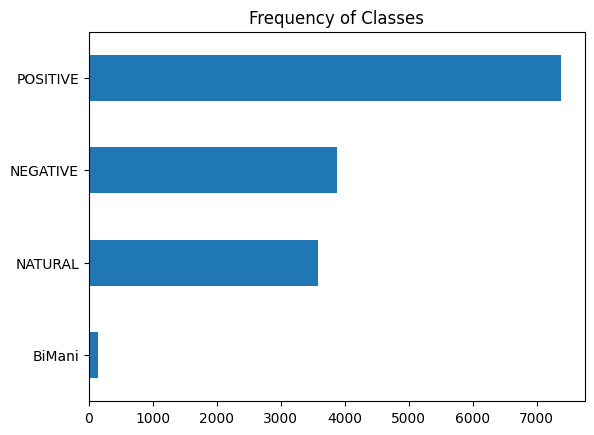

In [4]:
import matplotlib.pyplot as plt
df["average tag"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [5]:
BiMani_split_text_lists = list(df[df['average tag'] == 'BiMani']['text_split'])
BiMani_split_emoji_lists = list(df[df['average tag'] == 'BiMani']['emoji'])


def flatten(l):
    return [item for sublist in l for item in sublist]

BiMani_split_text_list = flatten(BiMani_split_text_lists)
BiMani_split_emoji_list = flatten(BiMani_split_emoji_lists)

In [6]:
import random 
import pandas as pd

len_Natural_class = df["average tag"].value_counts()['NATURAL']
len_BiMani_class = df["average tag"].value_counts()['BiMani']
mean_sentence_len = int(df["text_split"].str.len().mean())
mean_emoji_len = 2

len_BiMani_split_text_list = len(BiMani_split_text_list)
len_BiMani_split_emoji_list = len(BiMani_split_emoji_list)

line_num = len(df)+1

lines = []
texts = []
average_tags = []
emojis = []
text_splits = []
contexts = []

for counter in range(len_Natural_class-len_BiMani_class):
     token_num = random.randint(1, mean_sentence_len)
     emoji_num = random.randint(0,mean_emoji_len)
     text_split_list = []
     emoji_list = []
     
     if( random.randint(0,1) == 1):
         for i in range(emoji_num):
                emoji_indx = random.randint(0,len_BiMani_split_emoji_list-1)
                emoji_list.append(BiMani_split_emoji_list[emoji_indx])

     for i in range(token_num):
            token_indx = random.randint(0,len_BiMani_split_text_list-1)
            text_split_list.append(BiMani_split_text_list[token_indx])
            
     
     lines.append(line_num)
     texts.append(' '.join(text_split_list))
     average_tags.append('BiMani')
     emojis.append(emoji_list)
     text_splits.append(text_split_list)
     contexts.append(' '.join(text_split_list+emoji_list))
     line_num += 1
        
dict_df = {'line':lines ,
                'text': texts,
                'average tag':average_tags ,
                'emoji' :emojis,
                'text_split':text_splits ,
                'context': contexts
                }

df2 = pd.DataFrame.from_dict(dict_df, orient='index')
df2 = df2.transpose()

df = pd.concat([df,df2],ignore_index=True)

In [11]:
df.tail()

,line,text,average tag,emoji,text_split,context,Words Per class
18439,18440,ای قران,BiMani,[],"[ای, قران]",ای قران,7
18440,18441,میاد و تورکلر خخخخخ قا,BiMani,[:purple_heart:],"[میاد, و, تورکلر, خخخخخ, قا]",میاد و تورکلر خخخخخ قا :purple_heart:,37
18441,18442,باهالیسان از گرگور ما زحمت یاشا,BiMani,[],"[باهالیسان, از, گرگور, ما, زحمت, یاشا]",باهالیسان از گرگور ما زحمت یاشا,31
18442,18443,قربان از,BiMani,[:rose:],"[قربان, از]",قربان از :rose:,15
18443,18444,ملتیمیز کله که ueen0 اوران,BiMani,"[:tulip:, :face_with_tears_of_joy:]","[ملتیمیز, کله, که, ueen0, اوران]",ملتیمیز کله که ueen0 اوران :tulip: :face_with_...,59


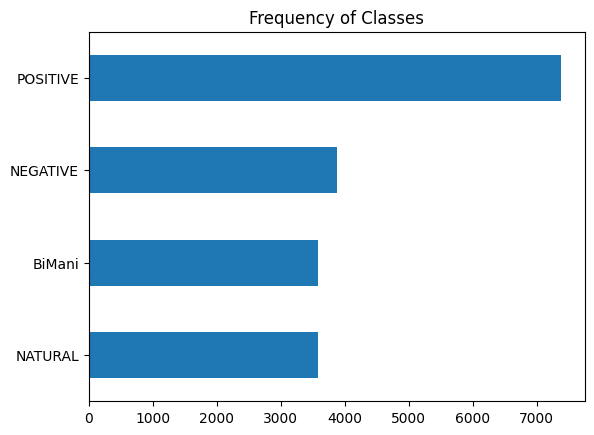

In [7]:
df["average tag"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

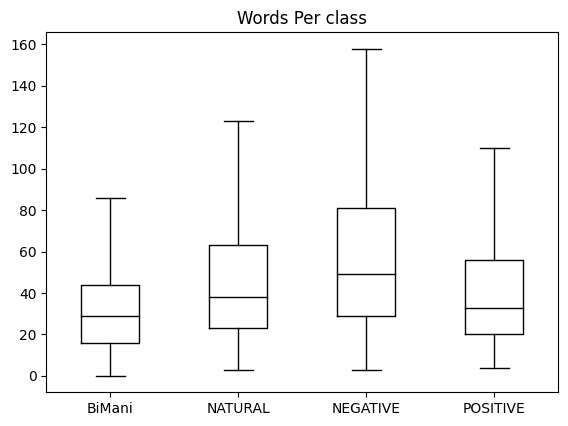

In [8]:
df["Words Per class"] = df["context"].apply(len)
df.boxplot("Words Per class", by="average tag", grid=False,
showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

labels = df['average tag'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [10]:
texts = df['context'].values
train_sentences, test_sentences, train_labels, test_labels = train_test_split(texts,
                                                                              encoded_labels,
                                                                              test_size=0.2,
                                                                              stratify = encoded_labels)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

one_hot_vectorizer = CountVectorizer()
one_hot = one_hot_vectorizer.fit_transform(train_sentences)
vocab = one_hot_vectorizer.get_feature_names_out()
one_hot = one_hot.toarray()

word_counts = {}
for label in range(4):
   word_counts[label] = defaultdict(lambda: 0)

for i in range(one_hot.shape[0]):
   label = train_labels[i]

   ''' each sentense has a vector as long as vocab '''
   for j in range(len(vocab)): 
       word_counts[label][vocab[j]] += one_hot[i][j]

In [13]:
def laplace_smoothing(n_label_items, vocab, word_counts, word, text_label):
    a = word_counts[text_label][word] + 1
    b = n_label_items[text_label] + len(vocab)
    return math.log(a/b)

In [14]:
def group_by_label(x, y, labels):
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    return data

In [15]:
def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    grouped_data = group_by_label(x, y, labels)
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = math.log(n_label_items[l] / n)
    return n_label_items, log_label_priors

In [16]:
def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(text.split(' '))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                log_w_given_l = laplace_smoothing(n_label_items, vocab, word_counts, word, l)
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))
    return result

In [17]:
labels = list(set(encoded_labels))
n_label_items, log_label_priors = fit(train_sentences,train_labels,labels)
pred = predict(n_label_items, vocab, word_counts, log_label_priors, labels, test_sentences)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred))

Accuracy of prediction on test set :  0.725670913526701


###### Dummy classifier

In [18]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_sentences,train_labels)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(test_sentences)
dummy_clf.score(test_sentences, test_labels)

0.40037950664136623